In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn import tree

In [3]:
def entropy(S):
  p1 = np.mean(S)
  p0 = 1-p1
  if p0==0 or p1==0:
    return 0
  return -p0*np.log2(p0) - p1*np.log2(p1)

def entropy_from_p1(p1):
  p0 = 1-p1
  if p0==0 or p1==0:
    return 0
  return -p0*np.log2(p0) - p1*np.log2(p1)

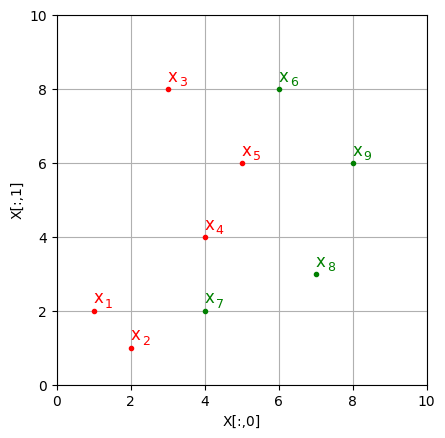

In [13]:
X = np.array([[1, 2], [2, 1], [3, 8], [4, 4], [5, 6], [6, 8], [4, 2], [7, 3], [8, 6]])

y = np.array([0]*len(X))
y[5:] = 1

fig, ax = plt.subplots()

color = 'rg'

for i in range(2):
    ax.plot(X[y==i,0],X[y==i,1],color = color[i],marker='.',linestyle='')

ax.set_aspect('equal')
ax.grid(True)

ax.set_xlim([0, 10])
ax.set_ylim([0, 10])

for i in range(X.shape[0]):
    s = str(i+1)
    ax.text(X[i,0],X[i,1]+.1, 'x', size=12,ha="left", va="bottom",color=color[y[i]],label = 'train')
    ax.text(X[i,0]+.3,X[i,1], s, size=9,ha="left", va="bottom",color=color[y[i]],label = 'train')


ax.set_xlabel("X[:,0]")
ax.set_ylabel("X[:,1]")
plt.show()


Consider the dataset plotted above, where examples $x_1,...,x_5$ belong to class 0 and $x_6,...,x_9$  belong to class 1.

What is the entropy of the dataset?

In [17]:
entropy_of_data = entropy(y)
print(entropy_of_data)

0.9910760598382222


What is the information gain of the binary attribute X[:,0]<=3.5?

In [19]:
entropy_of_data - 3/9*entropy([0]*3+[1]*0) - 6/9*entropy([0]*2+[1]*4)

0.3788788371352292

What is the information gain of the binary attribute X[:,1]<=5?

In [21]:
entropy_of_data - 5/9*entropy([0]*3+[1]*2) - 4/9*entropy([0]*2+[1]*2)

0.007214618474517431

What is the information gain of the binary attribute X[:,0]<=5.5?

In [22]:
entropy_of_data - 6/9*entropy([0]*5+[1]*1) - 3/9*entropy([0]*0+[1]*3)

0.5577277787393196

Draw decision trees $t1, t2$, and $t3$ that use binary attributes of the form $X[:,i]<=t$ and classify all the examples in the dataset correctly and have as roots the attributes mentioned above. That is,  the root of $t1$ is $X[:,0]<=3.5$,
the root of $t2$ is $X[:1]<=5$, and the root of $t3$ is $X[:,0]<=5.5$.


Build and display a decision tree to classify the dataset using sklearn.

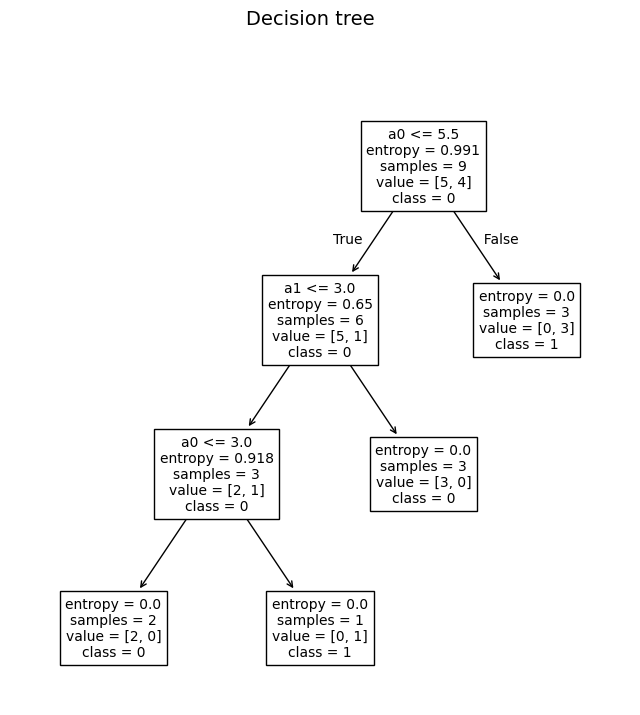

In [24]:
model = DecisionTreeClassifier(criterion='entropy')
model = model.fit(X, y)
fig, ax = plt.subplots(figsize=(8,8))
t = tree.plot_tree(model, feature_names=['a0','a1'],fontsize=10, ax=ax,class_names=['0','1'])
s=fig.suptitle('Decision tree', fontsize=14)